<a href="https://www.kaggle.com/code/heemalichaudhari/explanatory-data-analysis-water-quality?scriptVersionId=115277343" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction:

Drinking clean water is essential for maintaining good health because it helps to keep the body hydrated and to flush out toxins. The human body is made up of about 60% water, and it is important to replenish the water that is lost through normal bodily functions such as sweating, urination, and bowel movements. Clean water is also essential for cooking and for cleaning. Contaminated water can contain a variety of harmful substances that can cause illness, so it is important to make sure that the water you drink is clean and safe.





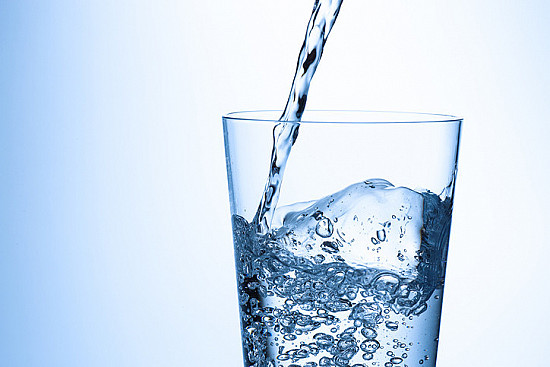

# Advantages of staying hydrated:

### Staying hydrated has numerous benefits for the body. Some of the main advantages of staying hydrated include:

* Maintaining the balance of bodily fluids: Water helps to regulate the balance of bodily fluids, which is important for proper functioning of the body's cells, tissues, and organs.

* Aiding in digestion: Water helps to break down food and move it through the digestive system.

* Regulating body temperature: Water helps to regulate body temperature by sweating and releasing heat when the body gets too hot.

* Moisturizing the skin: Water helps to keep the skin moisturized, which can help to prevent dryness and flaking.

* Maintaining physical performance: Staying hydrated can help to maintain physical performance during exercise and other physical activities.

* Aiding in weight loss: Drinking water can help to fill you up, which may make you less likely to eat more than you need.

* Flushing out toxins: Water helps to flush out toxins from the body, which can help to keep the kidneys functioning properly and may help to reduce the risk of kidney stones.

Overall, staying hydrated is an important part of maintaining good health and well-being.





# Importing Libraries:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.metrics import precision_score, confusion_matrix
from sklearn import tree


/kaggle/input/water-potability/water_potability.csv


# Data Content

* **pH Value**: The World Health Organization (WHO) recommends that the pH of drinking water should be between 6.5 and 8.5. This pH range is considered safe for consumption and is unlikely to cause any adverse health effects. Water with a pH outside of this range may taste unpleasant or have an unusual odor, and it may also contain harmful substances that can cause illness. For example, water with a very low pH (less than 6.5) may be corrosive and can leach metals from pipes, which can cause health problems if ingested. Water with a very high pH (greater than 8.5) may contain excess levels of minerals such as calcium and magnesium, which can cause health problems if consumed in large amounts over a long period of time. It is important to regularly test the pH of your drinking water to ensure that it falls within the recommended range. If the pH of your water is outside of the recommended range, you may need to take steps to adjust it or find an alternative source of drinking water.

* **Hardness**:Water hardness refers to the amount of dissolved minerals, specifically calcium and magnesium, in the water. Hard water is water that contains a high concentration of these minerals, while soft water has a low concentration of minerals. Hard water is not harmful to drink, but it can cause a variety of problems in household plumbing and appliances. The minerals in hard water can build up in pipes and water heaters, reducing their efficiency and potentially causing them to fail. Hard water can also leave deposits on dishes and laundry, making them appear dingy or spotted. On the other hand, soft water is generally considered to be more desirable for household use because it does not cause these problems. Soft water can also lather more easily with soap, making it more effective for cleaning. The hardness of water can be measured in units called grains per gallon (gpg) or milligrams per liter (mg/L). Water with a hardness of 0 to 3.5 gpg (or 0 to 60 mg/L) is considered to be soft, while water with a hardness of more than 7 gpg (or more than 120 mg/L) is considered to be hard. The appropriate level of water hardness for a household will depend on personal preference and the specific needs of the household.

* Solids (Total dissolved solids - TDS): Total dissolved solids (TDS) refer to the amount of dissolved minerals, salts, and other solid substances in water. These substances can include a variety of ions such as calcium, magnesium, potassium, and sodium, as well as small amounts of organic matter. TDS is typically measured in milligrams per liter (mg/L) or parts per million (ppm). The level of TDS in water can affect its taste, clarity, and overall quality. Water with a high level of TDS may taste salty or have an unusual flavor, and it may also appear cloudy or have a cloudy film on surfaces when it dries. High levels of TDS can also be an indication of the presence of other contaminants in the water.

* Chloramines: Chloramines are chemicals that are used to disinfect water and kill harmful bacteria and other pathogens. They are formed when ammonia is added to chlorine, which is commonly used as a disinfectant in water treatment plants. Chloramines are less effective at killing bacteria than chlorine, but they are more stable and longer-lasting, which makes them useful for maintaining a consistent level of disinfection in the water distribution system.


* Sulfate: Sulfate is a type of ion that consists of sulfur and oxygen atoms. It is commonly found in water as a result of the natural breakdown of minerals in rocks and soil. Sulfate is generally considered to be safe for human consumption, and it is not considered to be a health hazard at normal levels.


* Conductivity: Conductivity is the ability of a substance to conduct electricity. In the context of water, conductivity is a measure of the ability of water to conduct electricity and is related to the amount of dissolved ions in the water. These ions can include a variety of substances such as calcium, magnesium, sodium, and potassium.


* Organic_carbon: Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

* Trihalomethanes: THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

* Turbidity: The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

* Potability: Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.







# Read and Analyse Data

In [2]:
df = pd.read_csv("/kaggle/input/water-potability/water_potability.csv")

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Describing the data

In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# Dependent Variable Analysis

In [6]:
d = pd.DataFrame(df["Potability"].value_counts())
fig = px.pie(d, values = "Potability", names = ["Not Potable", "Potable"], hole = 0.35, opacity = 0.8,
            labels = {"label" :"Potability","Potability":"Number of Samples"})
fig.update_layout(title = dict(text = "Pie Chart of Potability Feature"))
fig.update_traces(textposition = "outside", textinfo = "percent+label")
fig.show()

# Correlation Between Features

In [7]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


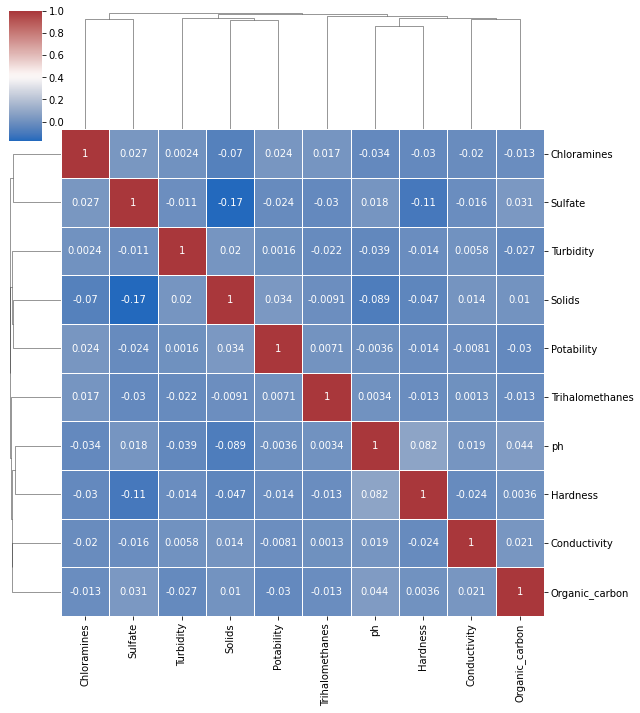

In [8]:
sns.clustermap(df.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))
plt.show()

# Distribution of Features

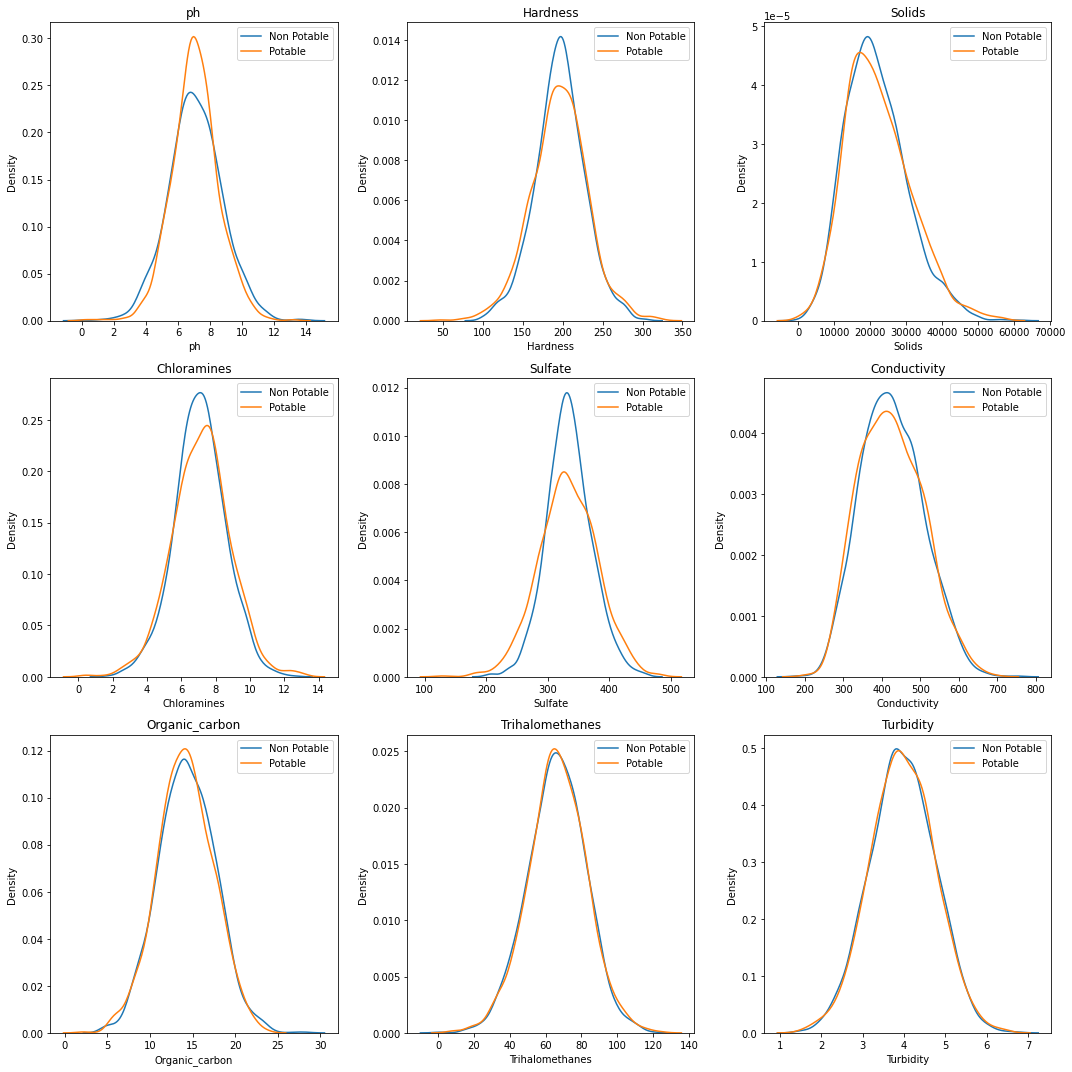

In [9]:
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
plt.tight_layout()

# Preprocessing: Missing Value Problem

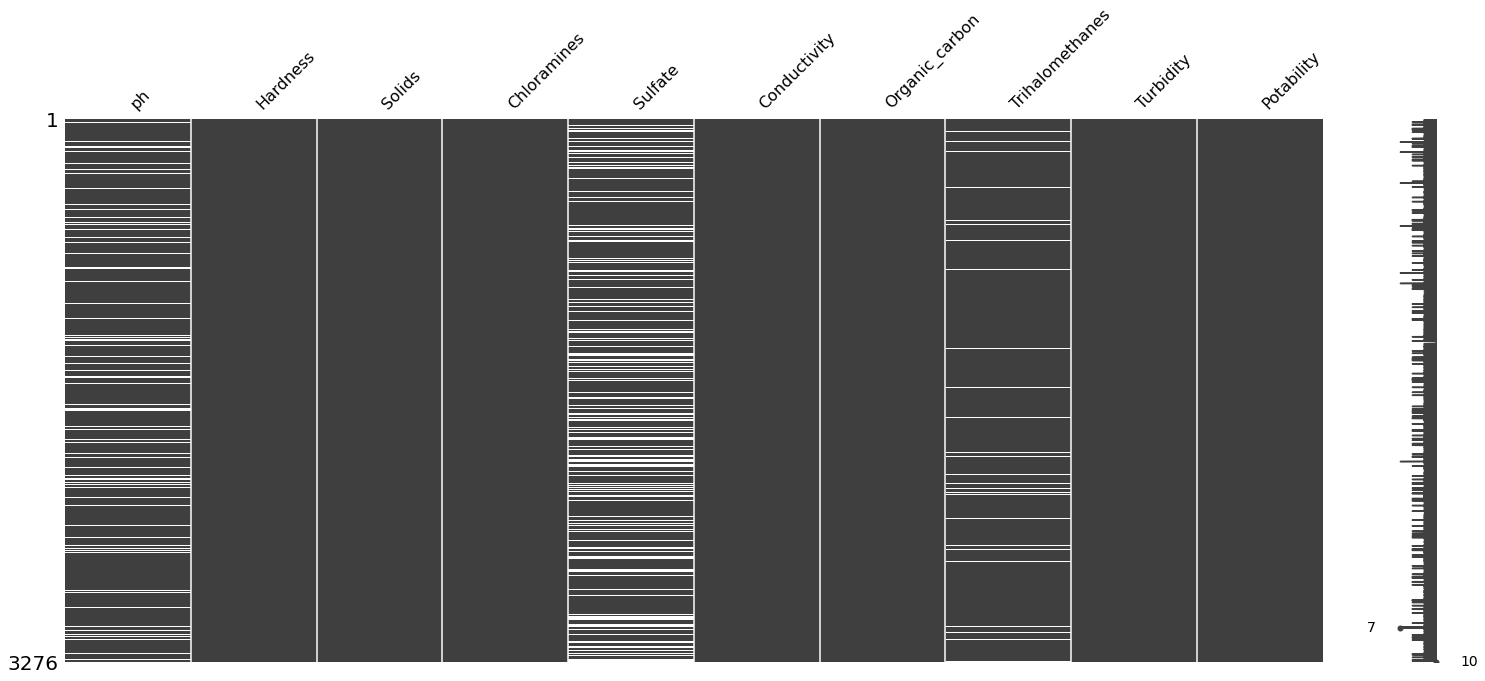

In [10]:
msno.matrix(df)
plt.show()

In [11]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# Handling missing value with average of features

In [12]:
df["ph"].fillna(value = df["ph"].mean(), inplace = True)
df["Sulfate"].fillna(value = df["Sulfate"].mean(), inplace = True)
df["Trihalomethanes"].fillna(value = df["Trihalomethanes"].mean(), inplace = True)

# Preprocessing: Train-Test Split and Normalization

In [13]:
X = df.drop("Potability", axis = 1).values
y = df["Potability"].values

# Train test split


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (2293, 9)
X_test (983, 9)
y_train (2293,)
y_test (983,)


# min-max normalization


In [15]:
x_train_max = np.max(X_train)
x_train_min = np.min(X_train)
X_train = (X_train - x_train_min)/(x_train_max-x_train_min)
X_test = (X_test - x_train_min)/(x_train_max-x_train_min)

# Modelling: Decision Tree and Random Forest Classifiers

* Precision Score: The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.


In [16]:
models = [("DTC", DecisionTreeClassifier(max_depth = 3)),
          ("RF",RandomForestClassifier())]

In [17]:
finalResults = []
cmList = []
for name, model in models:
    model.fit(X_train, y_train) # train
    model_result = model.predict(X_test) # prediction
    score = precision_score(y_test, model_result)
    cm = confusion_matrix(y_test, model_result)
    
    finalResults.append((name, score))
    cmList.append((name, cm))
finalResults

[('DTC', 0.5652173913043478), ('RF', 0.6212121212121212)]

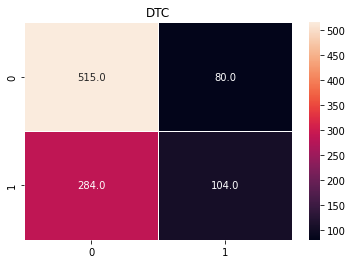

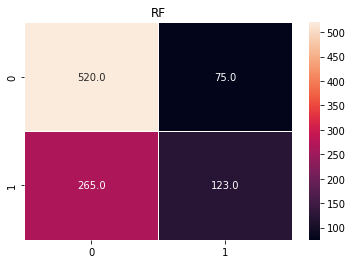

In [18]:
for name, i in cmList:
    plt.figure()
    sns.heatmap(i, annot = True, linewidths = 0.8, fmt = ".1f")
    plt.title(name)
    plt.show()

# Visualize Decision Tree

In [19]:
dt_clf = models[0][1]
dt_clf

DecisionTreeClassifier(max_depth=3)

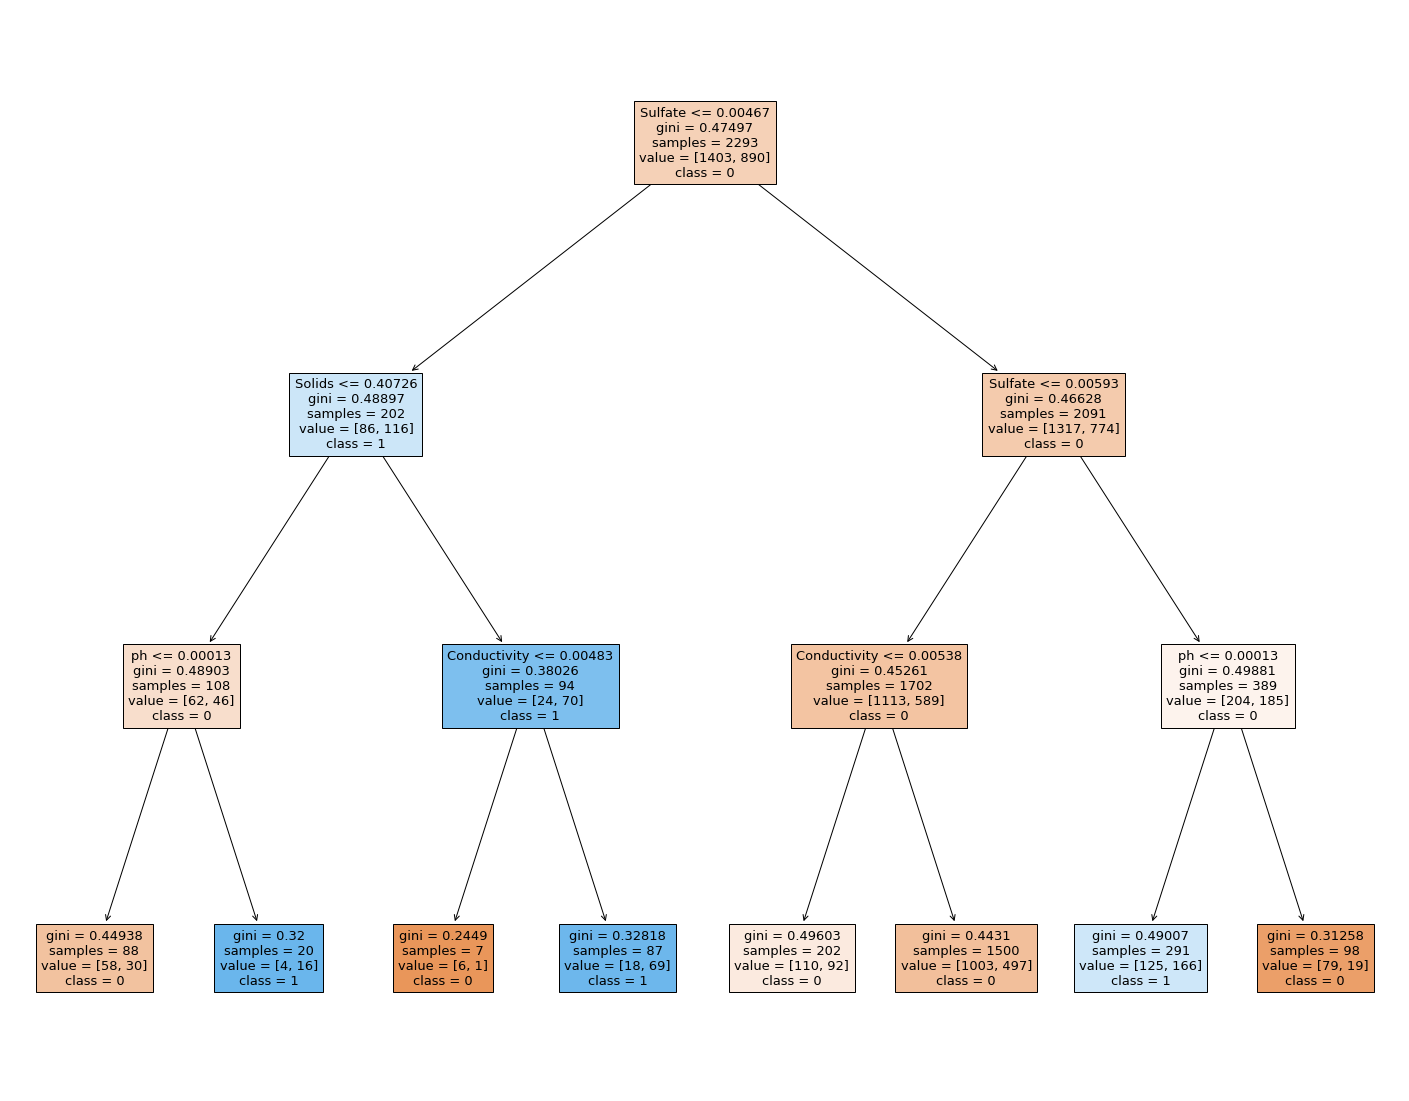

In [20]:
plt.figure(figsize = (25,20))
tree.plot_tree(dt_clf,
               feature_names =  df.columns.tolist()[:-1],
               class_names = ["0", "1"],
               filled = True,
               precision = 5)
plt.show()

# Random Forest Hyperparameter Tuning

In [21]:
model_params = {
    "Random Forest":
    {
        "model":RandomForestClassifier(),
        "params":
        {
            "n_estimators":[10, 50, 100],
            "max_features":["auto","sqrt","log2"],
            "max_depth":list(range(1,21,3))
        }
    }
    
}
model_params

{'Random Forest': {'model': RandomForestClassifier(),
  'params': {'n_estimators': [10, 50, 100],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth': [1, 4, 7, 10, 13, 16, 19]}}}

In [22]:
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2)
scores = []
for model_name, params in model_params.items():
    rs = RandomizedSearchCV(params["model"], params["params"], cv = cv, n_iter = 10)
    rs.fit(X,y)
    scores.append([model_name, dict(rs.best_params_),rs.best_score_])
scores

[['Random Forest',
  {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 13},
  0.6712474399553156]]

# Conclusion:

## What I learned in this project: 
* Correlation analysis
* Preprocessing: missing value, train-test split and normalization
* Modelling: Decision Tree and Random Forest Classifiers
* Visualize Decision Tree
* Random Forest Hyperparameter Tuning
* Bivariate and multivariate data analysis

